In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'font.size': 20,
        'figure.figsize': (13, 10),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

##  Data inspection

In [4]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_df.shape

(731, 16)

In [7]:
print(f'Total number of rows: {bike_df.shape[0]}')
print(f'Total number of columns: {bike_df.shape[1]}')

Total number of rows: 731
Total number of columns: 16


In [8]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
#check for numerical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
#check for columns present in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
null_count = bike_df.isnull().sum()
print(null_count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Make categorical features from numerical

In [15]:
bike_df['season'].replace(
    {
        1: 'spring',
        2: 'summer',
        3: 'fall',
        4: 'winter'
    },
    inplace=True)

bike_df['weekday'].replace(
    {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    },
    inplace=True)

bike_df['weathersit'].replace(
    {
        1: 'Clear/Partly cloudy',
        2: 'Mist/Cloudy',
        3: 'Light-Snow/Rain/Storm'
    },
    inplace=True)

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,Monday,1,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,Tuesday,1,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Remove exceseeve columns

In [16]:
new_bike = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
    'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [23]:
new_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,1,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,1,0,Monday,1,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,1,0,Tuesday,1,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,1600


In [17]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.7+ KB


### Set numeric columns as numeric type and categorical as objects (strings)

In [18]:
# all these columns are already numeric, code below just for verification
new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]\
    .apply(pd.to_numeric)

In [19]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.7+ KB


In [20]:
# Conver catgorical features to object type

new_bike['mnth'] = new_bike['mnth'].astype('object')
new_bike['weekday'] = new_bike['weekday'].astype('object')
new_bike['season'] = new_bike['season'].astype('object')
new_bike['weathersit'] = new_bike['weathersit'].astype('object')

In [21]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


## Numerical features analysis

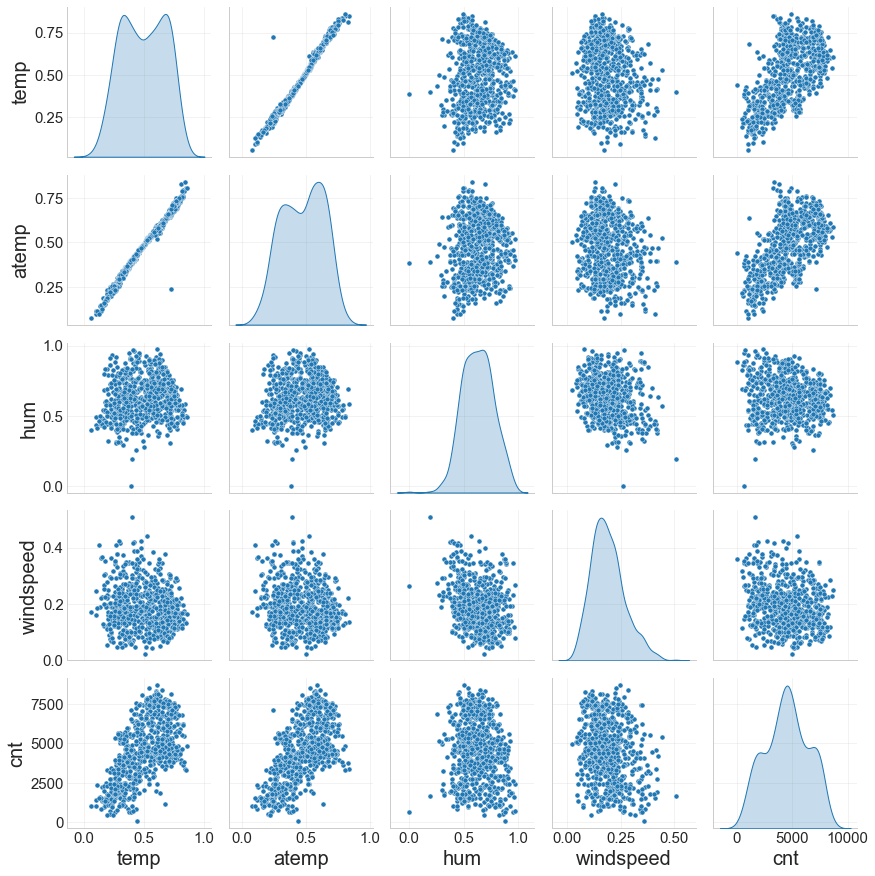

In [28]:
num_vars = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

### Heatmap to check correlation

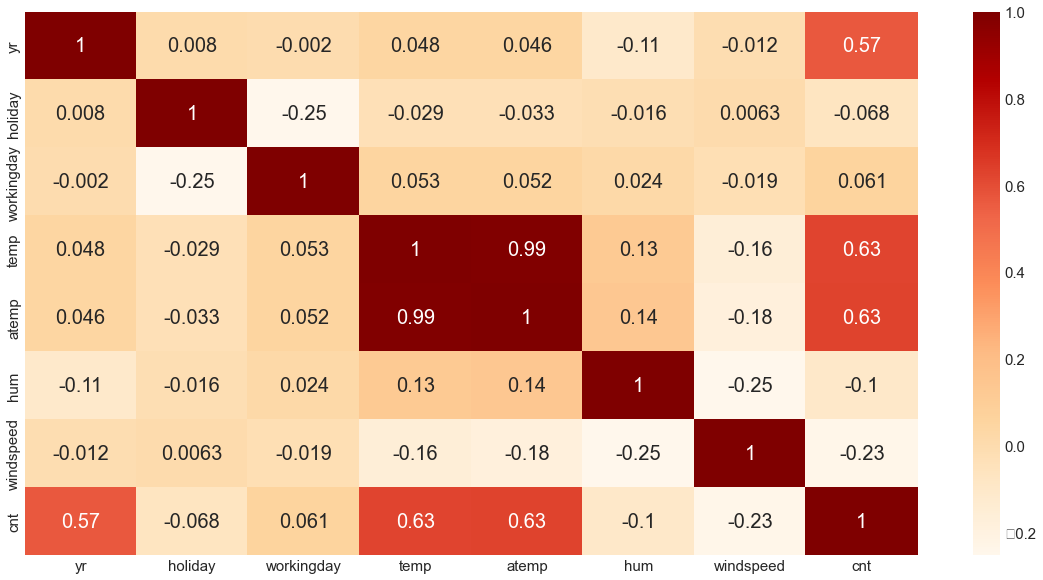

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(new_bike.corr(), annot = True, cmap="OrRd")
plt.show()

## Categorical features analysis

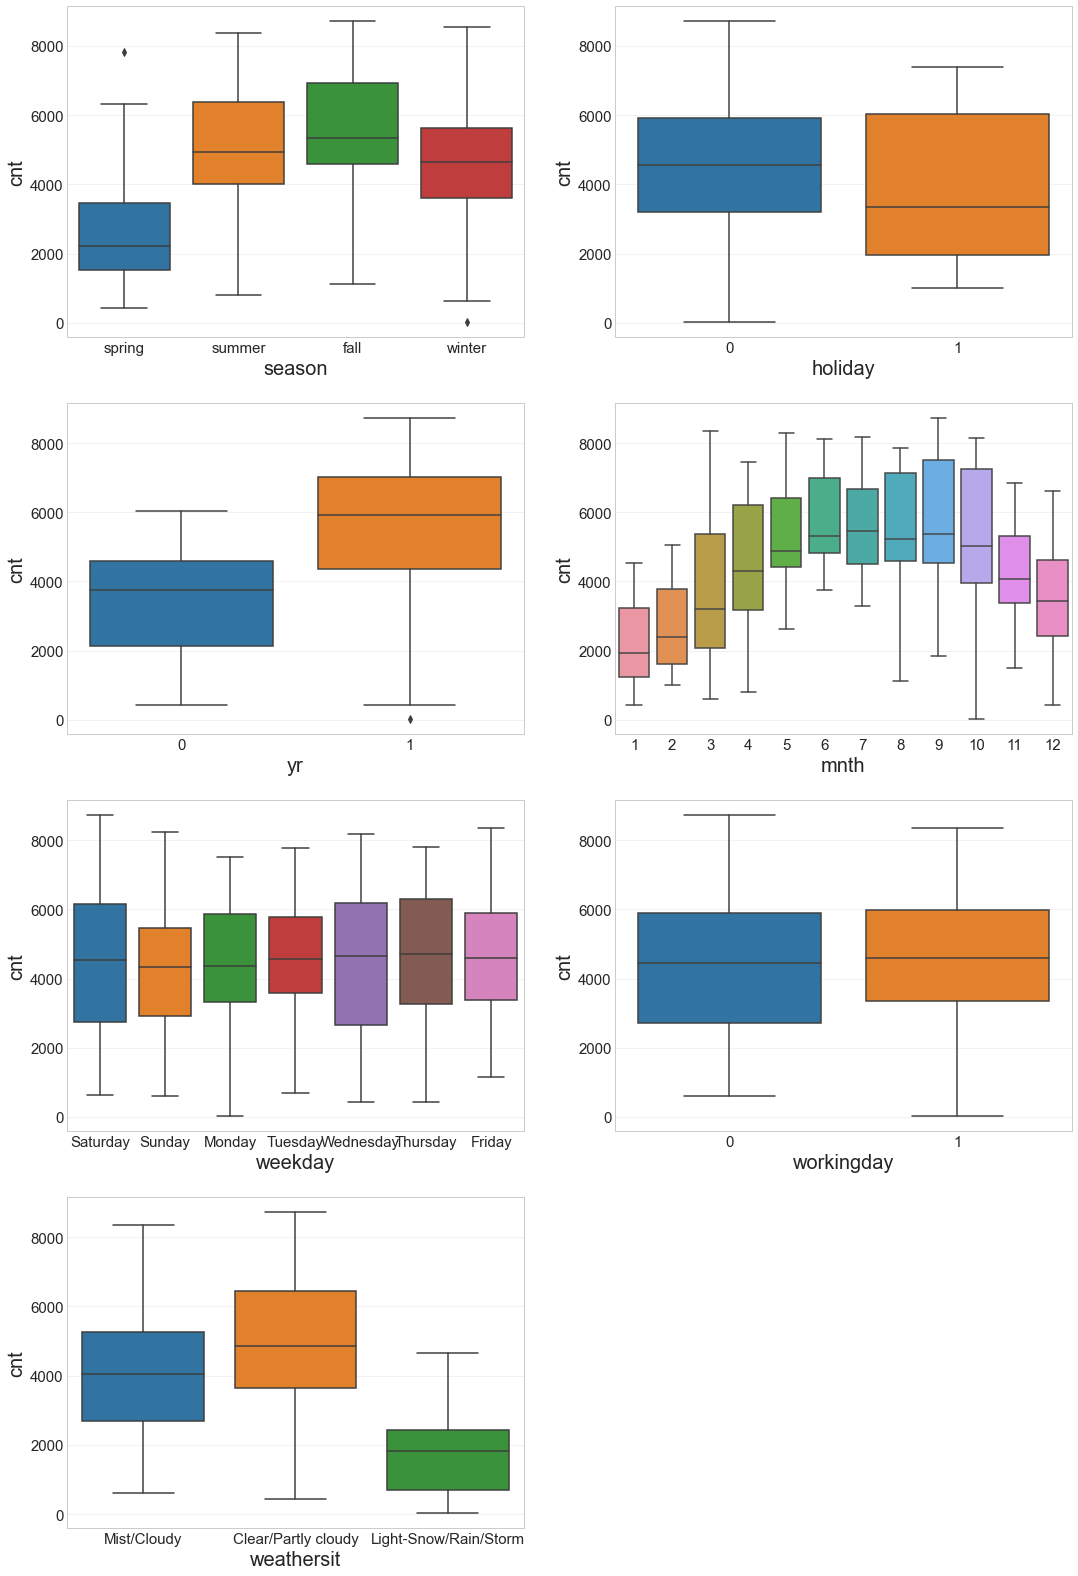

In [30]:
# Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=new_bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data=new_bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data=new_bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data=new_bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=new_bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=new_bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=new_bike)

plt.show()

### Year, month and working day

Text(0, 0.5, 'average cnt')

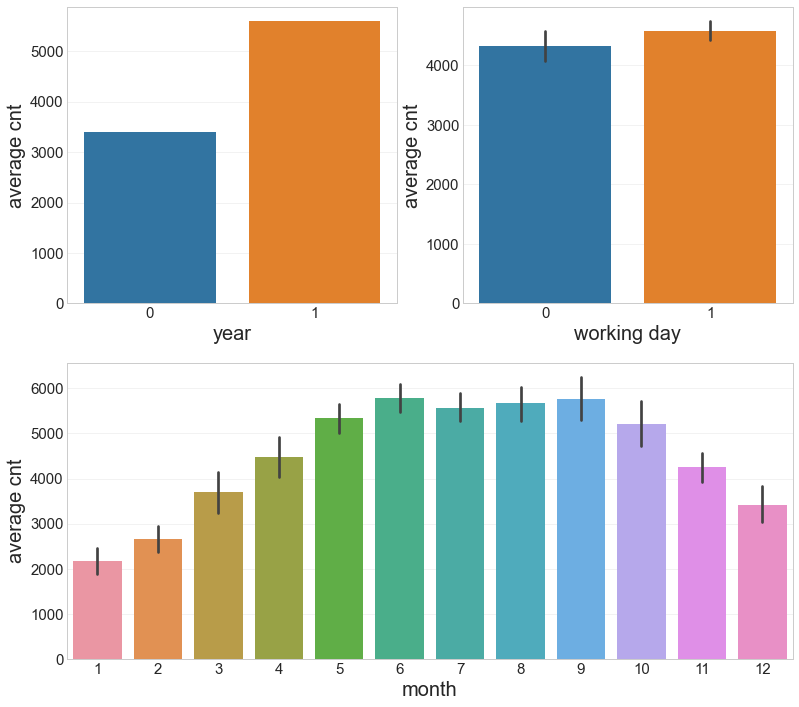

In [74]:
plt.figure(figsize=(13, 12))

plt.subplot(2, 2, 1)
total_cnt_pre_year = new_bike.groupby('yr').cnt.mean()
sns.barplot([0, 1], total_cnt_pre_year)
plt.xlabel('year')
plt.ylabel('average cnt')

plt.subplot(2, 2, 2)
sns.barplot(data=new_bike, x="workingday", y="cnt")
plt.xlabel('working day')
plt.ylabel('average cnt')

plt.subplot(2, 1, 2)
sns.barplot(data=new_bike, x="mnth", y="cnt")
plt.xlabel('month')
plt.ylabel('average cnt')

### Season and weather list

In [76]:
def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

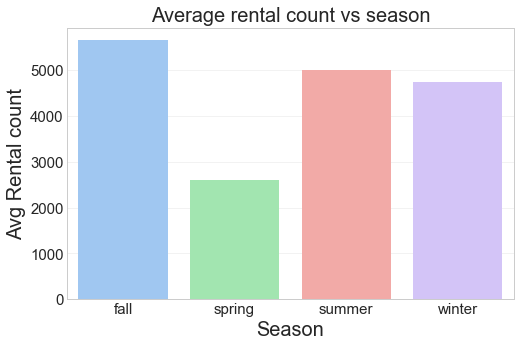

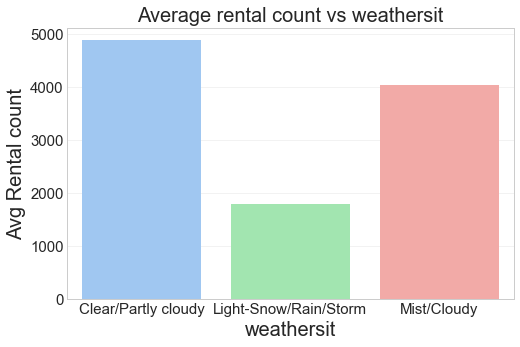

In [77]:
# season vs rental count
dist1 = bike_df.groupby(by='season').cnt.mean()
distribution(data=dist1,
             title='Average rental count vs season',
             x_label='Season',
             y_label='Avg Rental count')

# weathersit vs rental count
dist2 = bike_df.groupby(by='weathersit').cnt.mean()
distribution(data=dist2,
             title='Average rental count vs weathersit',
             x_label='weathersit',
             y_label='Avg Rental count')

### Split categoriacal variables

In [83]:
# Convert categorical variables columns with n unique values to n or n-1 columns of indicators
# By defolt it convets all object type variables but we can cpecify it with columns parameter
new_bike = pd.get_dummies(data=new_bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                731 non-null    int64  
 1   holiday                           731 non-null    int64  
 2   workingday                        731 non-null    int64  
 3   temp                              731 non-null    float64
 4   atemp                             731 non-null    float64
 5   hum                               731 non-null    float64
 6   windspeed                         731 non-null    float64
 7   cnt                               731 non-null    int64  
 8   season_spring                     731 non-null    uint8  
 9   season_summer                     731 non-null    uint8  
 10  season_winter                     731 non-null    uint8  
 11  mnth_2                            731 non-null    uint8  
 12  mnth_3  

In [84]:
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
new_bike.shape

(731, 30)

### Correlation among all variables after adding dummies

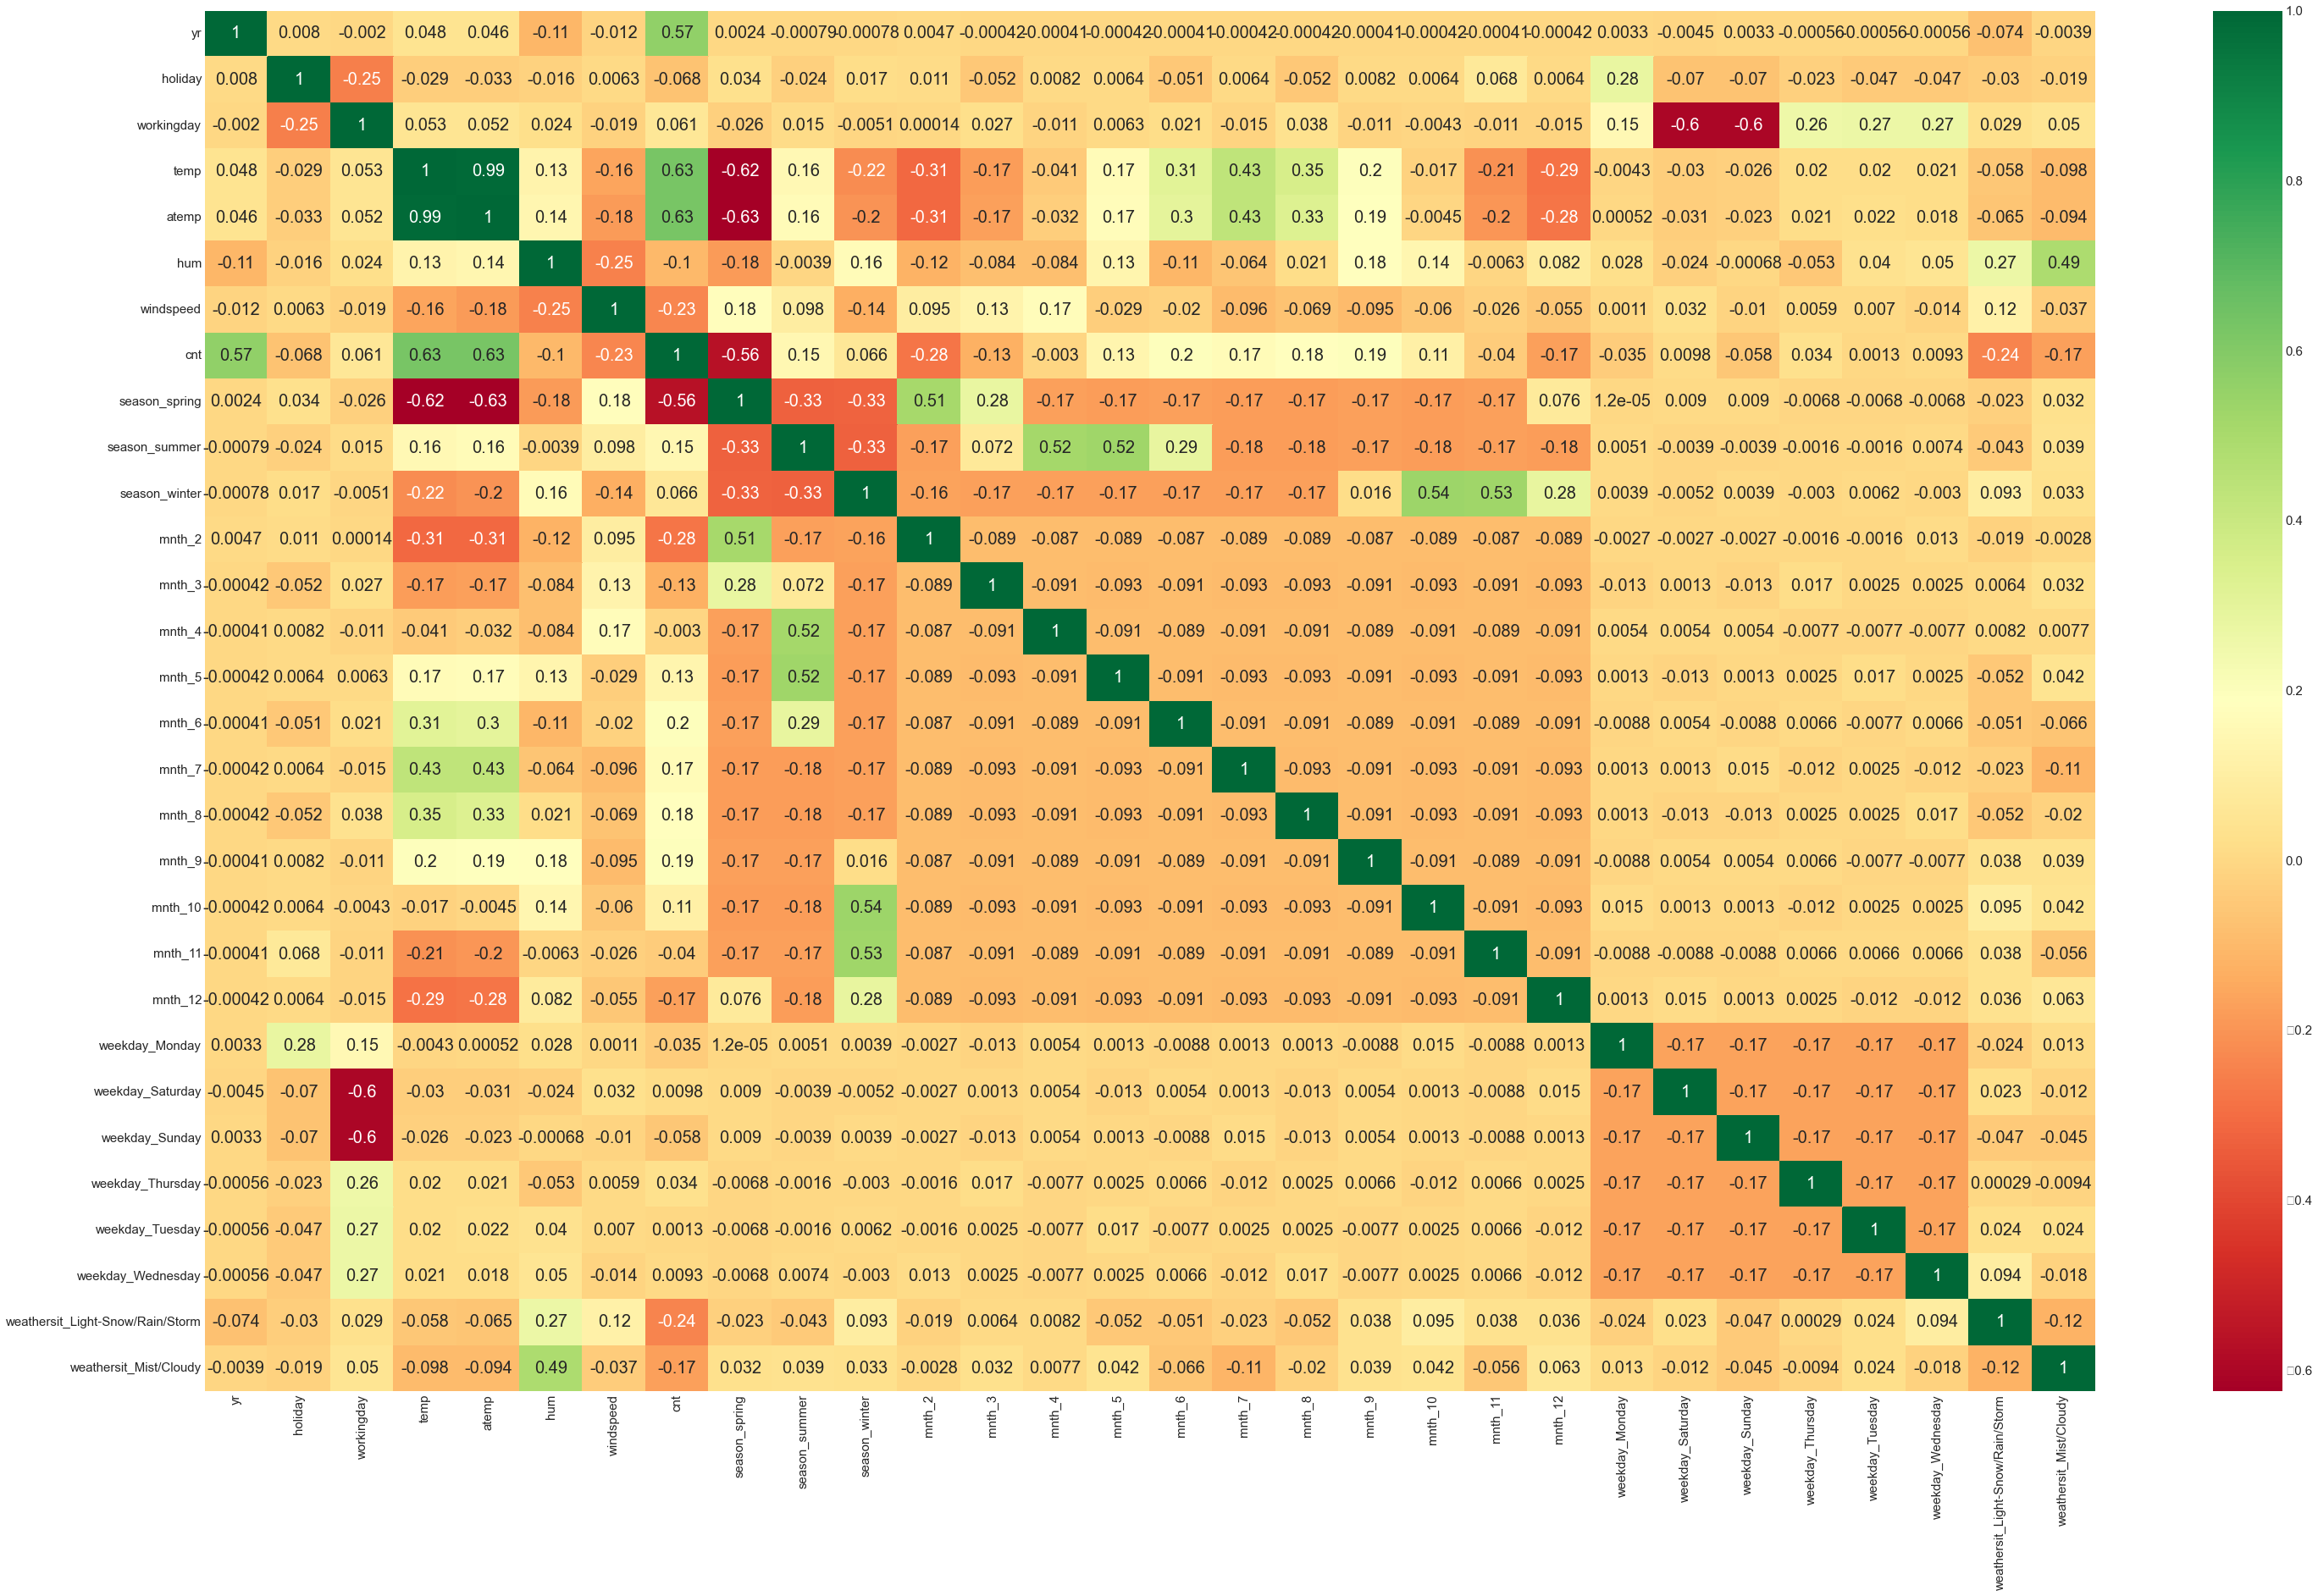

In [93]:
plt.figure(figsize = (50,30))
sns.heatmap(new_bike.corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Split data to train and test

In [87]:
np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.8, test_size = 0.2, random_state = 111)

In [88]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 678 to 724
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                584 non-null    int64  
 1   holiday                           584 non-null    int64  
 2   workingday                        584 non-null    int64  
 3   temp                              584 non-null    float64
 4   atemp                             584 non-null    float64
 5   hum                               584 non-null    float64
 6   windspeed                         584 non-null    float64
 7   cnt                               584 non-null    int64  
 8   season_spring                     584 non-null    uint8  
 9   season_summer                     584 non-null    uint8  
 10  season_winter                     584 non-null    uint8  
 11  mnth_2                            584 non-null    uint8  
 12  mnth_3

In [89]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 607 to 310
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                147 non-null    int64  
 1   holiday                           147 non-null    int64  
 2   workingday                        147 non-null    int64  
 3   temp                              147 non-null    float64
 4   atemp                             147 non-null    float64
 5   hum                               147 non-null    float64
 6   windspeed                         147 non-null    float64
 7   cnt                               147 non-null    int64  
 8   season_spring                     147 non-null    uint8  
 9   season_summer                     147 non-null    uint8  
 10  season_winter                     147 non-null    uint8  
 11  mnth_2                            147 non-null    uint8  
 12  mnth_3

## Feature scaling

In [105]:
scale =  MinMaxScaler()

In [103]:
bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[bike_num].agg(['min', 'max'])

,temp,atemp,hum,windspeed,cnt
min,0.059130,0.079070,0.254167,0.022392,22
max,0.861667,0.840896,0.972500,0.441563,8555


In [110]:
# Apply scaler on the numerical variables of train dataset

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[bike_num] = scale.fit_transform(bike_train[bike_num])
bike_train[bike_num].agg(['min', 'max'])

,temp,atemp,hum,windspeed,cnt
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [111]:
# post rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.484589,0.030822,0.678082,0.540289,0.515927,0.524983,0.397403,0.521448,0.244863,0.256849,...,0.089041,0.082192,0.135274,0.148973,0.142123,0.143836,0.143836,0.143836,0.020548,0.344178
std,0.500191,0.172983,0.467612,0.227872,0.213594,0.190433,0.182138,0.224593,0.430375,0.437270,...,0.285047,0.274892,0.342309,0.356367,0.349476,0.351224,0.351224,0.351224,0.141987,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338295,0.328148,0.384281,0.266682,0.364028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.533046,0.527552,0.376825,0.523497,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740665,0.694260,0.667633,0.495899,0.686511,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
678,1,0,1,0.376975,0.362738,0.399071,0.458443,0.699637,0,0,...,1,0,0,0,0,0,0,0,0,0
647,1,0,1,0.482890,0.471292,0.706497,0.400572,0.746514,0,0,...,0,0,0,0,0,0,1,0,0,1
516,1,0,1,0.773634,0.724915,0.332367,0.412450,0.857377,0,1,...,0,0,0,0,0,1,0,0,0,0
683,1,0,1,0.286637,0.265800,0.414732,0.422818,0.641392,0,0,...,1,0,0,0,0,0,0,1,0,0
537,1,0,1,0.930428,0.884023,0.436775,0.229966,0.689441,0,0,...,0,0,0,0,0,1,0,0,0,0


## Build linear model

## Feature selection with recursive feature elimination (RFE)

In [113]:
# creating y variable to hold our taget variable : cnt
y = bike_train.pop('cnt')
x = bike_train

# using Linearregression().fit() in order to get the right fitting model
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [125]:
# Apply RFE with 15 output variables
r = RFE(lr, n_features_to_select=15)
#using Linearregression().fit() in order to get the right fitting model
r = r.fit(x, y)

In [130]:
# creating a new dataframe to store columns along with their respective ranks and support values (status)
# selected (best) features have rank = 1
r_bike = pd.DataFrame ({'Predictors' : x.columns, 'Status' : r.support_, 'Rank' : r.ranking_})
r_bike.sort_values(by='Rank')

,Predictors,Status,Rank
0,yr,True,1
18,mnth_10,True,1
17,mnth_9,True,1
27,weathersit_Light-Snow/Rain/Storm,True,1
13,mnth_5,True,1
12,mnth_4,True,1
11,mnth_3,True,1
9,season_winter,True,1
14,mnth_6,True,1
7,season_spring,True,1


In [148]:
# variables allowed by RFE (15)
new_col = x.columns[r.support_]
new_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_9',
       'mnth_10', 'weathersit_Light-Snow/Rain/Storm',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [147]:
# variables rejected by RFE (15)
x.columns[~r.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_2', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Now we can take a look at Variance Informatio Factors (VIF) of predictors

In [143]:
# now create a new general function for further calculating the VIF (variance inflation factor) for our models.

def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors'] = df.columns
    
    # df.values seems exceseeve, we can use just df
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by='VIF_Value', ascending=False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

In [144]:
get_vif(x)

,Predictors,VIF_Value
0,temp,70.07
1,workingday,66.68
2,atemp,59.99
3,weekday_Saturday,14.42
4,weekday_Sunday,14.14
5,season_spring,10.28
6,mnth_7,8.67
7,season_winter,8.46
8,mnth_8,8.26
9,season_summer,7.72


In [149]:
# creating a new dataframe x_rfe with RFE selected variables
x_rfe = x[new_col]